<a href="https://colab.research.google.com/github/Szczureczek1983/Applied-Data-Science-with-Python-and-Jupyter/blob/master/ucho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
!git clone https://github.com/matzim95/ML-datasets.git


fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
register_matplotlib_converters()


In [121]:
Ucho = pd.read_csv('ML-datasets/abalone.csv')
Ucho.head(10)

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [122]:
Ucho.shape

(4177, 9)

In [123]:
Ucho.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
dtype: object

In [124]:
Ucho.sex = Ucho.sex.map({'M':0, "F":1, "I":2})
Ucho = pd.get_dummies(Ucho)
Ucho.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [125]:
Ucho.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole weight      0
shucked weight    0
viscera weight    0
shell weight      0
rings             0
dtype: int64

In [126]:
Ucho.dtypes

sex                 int64
length            float64
diameter          float64
height            float64
whole weight      float64
shucked weight    float64
viscera weight    float64
shell weight      float64
rings               int64
dtype: object

In [127]:
Ucho.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,4177.0,0.955470,0.827815,0.0000,0.0000,1.0000,2.000,2.0000
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [128]:

col = ['sex', 'whole weight', 'rings',"diameter"]

In [129]:
Ucho[col].corr()

,sex,whole weight,rings,diameter
sex,1.000000,-0.461238,-0.351822,-0.458245
whole weight,-0.461238,1.000000,0.540390,0.925452
rings,-0.351822,0.540390,1.000000,0.574660
diameter,-0.458245,0.925452,0.574660,1.000000


In [130]:
import seaborn as sns

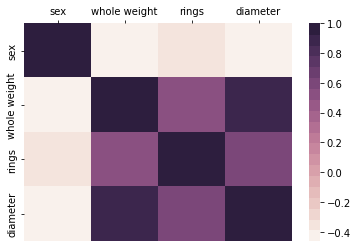

In [131]:
ax = sns.heatmap(Ucho[col].corr(), cmap=sns.cubehelix_palette(20, light = 0.95, dark = 0.15))
ax.xaxis.tick_top()

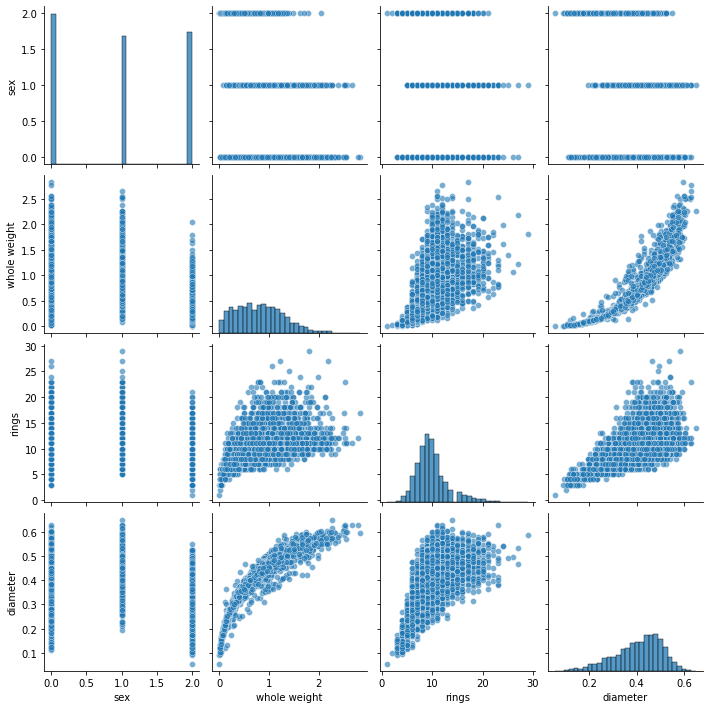

In [132]:
sns.pairplot(Ucho[col], plot_kws={'alpha':0.6}, diag_kws={'bins': 30})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


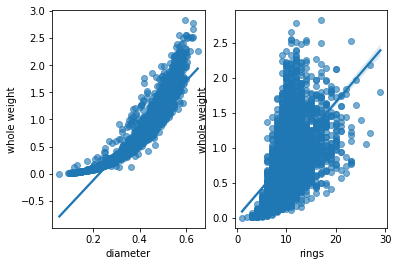

In [133]:
fig, ax = plt.subplots(1,2) 
sns.regplot('diameter', "whole weight", Ucho, ax = ax[0],scatter_kws={'alpha':0.6})
sns.regplot('rings','whole weight', Ucho, ax=ax[1],scatter_kws = {"alpha":0.6})

In [134]:
X = Ucho[['diameter']]
y = Ucho['whole weight']

In [135]:
X.values[:5]

array([[0.365],
       [0.265],
       [0.42 ],
       [0.365],
       [0.255]])

In [136]:
y.values[:5]

array([0.514 , 0.2255, 0.677 , 0.516 , 0.205 ])

In [137]:
model = LinearRegression()

In [138]:
model.fit(X,y)

LinearRegression()

In [139]:
model.intercept_

-1.0365302167051125

In [140]:
model.coef_

array([4.57307698])

In [160]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [142]:
X_poly[:5]

array([[1.      , 0.365   , 0.133225],
       [1.      , 0.265   , 0.070225],
       [1.      , 0.42    , 0.1764  ],
       [1.      , 0.365   , 0.133225],
       [1.      , 0.255   , 0.065025]])

In [161]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [164]:
predict_data = [[0.4]]
predict_data_poly = poly.transform(predict_data)
model.predict(predict_data_poly)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


array([0.68499993])

In [165]:
model.intercept_

0.3477209351149102

In [166]:
model.coef_

array([ 0.        , -3.35552485, 10.49680583])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


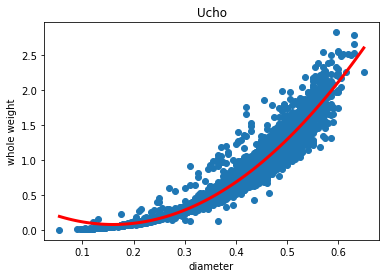

In [167]:
theta_0 = model.intercept_
theta_1 = model.coef_[0]
theta_2 = model.coef_[1]

x = np.linspace(min(X.values), max(X.values), 100)
x_poly = poly.transform(x)

plt.scatter(X, y)
pred = model.predict(x_poly)

plt.plot(x, pred, 'r', linewidth = 3)
plt.xlabel('diameter')
plt.ylabel('whole weight')
plt.title('Ucho')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


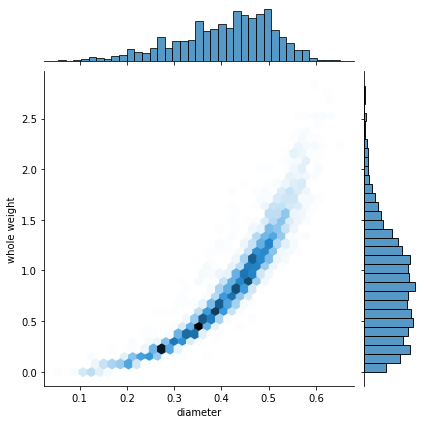

In [148]:
sns.jointplot('diameter', 'whole weight', data = Ucho, kind = "hex")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


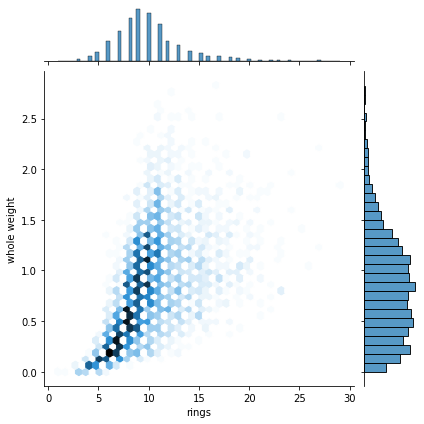

In [149]:
sns.jointplot('rings', 'whole weight', data = Ucho, kind = "hex")